# Redes Neuronales Retroalimentadas.
## Base de datos de Breast Cancer Winsconsin (Diagnostic) o Cáncer de Mama de Wisconsin (Diagnóstico).

La **base de datos** ha sido seleccionada del **repositorio de la UCI**, más concretamente del enlace https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29 . Todas las **columnas**, *excepto la primera y la última*, toman **valores numéricos entre el 1 y el 10**. La primera es un código numérico (del identificador de la muestra), y la última toma los valores **2 o 4**, según el tumor sea **benigno o maligno**, respectivamente.

## Índice
- [1 - Introducción](#1)

- [2 - Preprocesamiento de datos](#2)

- [3 - Análisis descriptivo](#3)

- [4 - Red Neuronal Retroalimentada](#4)
    - [4.1 - División de los datos](#4-1)
    - [4.2 - Funciones de activación. ](#4-2)
    - [4.3 - Propagación hacia delante ](#4-3)
    - [4.4 - Retro-propagación ](#4-4)
    - [4.5 - Modelo completo ](#4-5)
    
- [5 - Aplicación](#5)
    - [5.1 - Red Neuronal Retroalimentada de L=3 capas](#5-1)
    - [5.2 - Red Neuronal Retroalimentada de L=5 capas](#5-2)
    
- [6 - Conclusiones](#6)




<a name='1'></a>
## 1. Introducción

Empezaremos declarando las **bibliotecas/módulos** que vamos a usar, leer la base de datos e imprimirla por pantalla. 
Además, tal como tenemos la información, debemos declarar una variable con el nombre de las columnas, y usaremos como índice
de las filas el número del código de la muestra, pues esta información no nos va a resultar útil para predecir nuestra variable
objetivo.

El objetivo será desarrollar una (más bien varias) redes neuronales retroalimentadas con el propósito de la base de datos dada y conseguir un modelo que a partir de las variables de entrada sea capaz de predecir si la persona dada va a sufrir un tumor benigno o maligno. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
columnas=["Sample code numbrer","Clump thickness", "Uniformity of Cell Size","Uniformity of Cell Shape ",
"Marginal Adhesion", "Single Epithelial Cell Size","Bare Nuclei", "Bland Chromatin",
"Normal Nucleoli","Mitoses", "Class"]
columnas = ["Número  de código de muestra", "Espesor del grupo", "Uniformidad del tamaño de la célula", "Uniformidad de la forma de la célula",
"Adhesión marginal", "Tamaño de célula epitelial única", "Núcleos desnudos", "Cromatina blanda",
"Nucleolos normales", "Mitosis", "Clase"]


In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
data= pd.read_csv(url, names = columnas, index_col = 0, na_values='?')

Ahora veamos la **forma** de nuestros datos (cuantas filas y columnas tenemos) y el **nombre de las columnas** ( en esta base, ni haría falta, pues tan solo tendremos 10 columnas, pero resultara útil en otras con mayor número). 
Además, veremos una **muestra pequeña** de nuestros datos y observaremos unas **características** respecto a la media, la cantidad, máximos y mínimos, desviación típica,...

In [4]:
print(data.shape)
print(data.columns)

(699, 10)
Index(['Espesor del grupo', 'Uniformidad del tamaño de la célula',
       'Uniformidad de la forma de la célula', 'Adhesión marginal',
       'Tamaño de célula epitelial única', 'Núcleos desnudos',
       'Cromatina blanda', 'Nucleolos normales', 'Mitosis', 'Clase'],
      dtype='object')


In [5]:
data.head(8)

,Espesor del grupo,Uniformidad del tamaño de la célula,Uniformidad de la forma de la célula,Adhesión marginal,Tamaño de célula epitelial única,Núcleos desnudos,Cromatina blanda,Nucleolos normales,Mitosis,Clase
Número de código de muestra,,,,,,,,,,
1000025,5,1,1,1,2,1.0,3,1,1,2
1002945,5,4,4,5,7,10.0,3,2,1,2
1015425,3,1,1,1,2,2.0,3,1,1,2
1016277,6,8,8,1,3,4.0,3,7,1,2
1017023,4,1,1,3,2,1.0,3,1,1,2
1017122,8,10,10,8,7,10.0,9,7,1,4
1018099,1,1,1,1,2,10.0,3,1,1,2
1018561,2,1,2,1,2,1.0,3,1,1,2


In [6]:
data.describe()

,Espesor del grupo,Uniformidad del tamaño de la célula,Uniformidad de la forma de la célula,Adhesión marginal,Tamaño de célula epitelial única,Núcleos desnudos,Cromatina blanda,Nucleolos normales,Mitosis,Clase
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [7]:
data['Clase'].describe()

count    699.000000
mean       2.689557
std        0.951273
min        2.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        4.000000
Name: Clase, dtype: float64

La primera columna es poco útil (número de código). En el resto (excepto la última), vemos que todos tienen valores entre el 1 y el 10, al menos uno en cada columna, luego podriamos decir que hay **cierta variabilidad**. En cuanto a la última columna, nuestra columna objetivo, la única información útil que obtenemos es la media, que es 2.68 ; es decir, tenemos más datos benignos que malignos. Además, vamos a modificar también sus **valores numéricos 2 y 4** por **0 y 1** (para ser más sencillo, 0-negativo(benigno), 1-positivo(maligno). También, destacamos que de la columna 'Núcleos desnudos' faltan valores.

In [10]:
data["Clase"] = data["Clase"].replace({2:0, 4:1})


In [11]:
data

,Espesor del grupo,Uniformidad del tamaño de la célula,Uniformidad de la forma de la célula,Adhesión marginal,Tamaño de célula epitelial única,Núcleos desnudos,Cromatina blanda,Nucleolos normales,Mitosis,Clase
Número de código de muestra,,,,,,,,,,
1000025,5,1,1,1,2,1.0,3,1,1,0
1002945,5,4,4,5,7,10.0,3,2,1,0
1015425,3,1,1,1,2,2.0,3,1,1,0
1016277,6,8,8,1,3,4.0,3,7,1,0
1017023,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
776715,3,1,1,1,3,2.0,1,1,1,0
841769,2,1,1,1,2,1.0,1,1,1,0
888820,5,10,10,3,7,3.0,8,10,2,1


In [12]:
data.Clase.describe()

count    699.000000
mean       0.344778
std        0.475636
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Clase, dtype: float64

In [13]:
porc_0 = data[data.Clase==0].Clase.count() / data.shape[0] * 100
porc_0

65.52217453505007

Es decir, el **65.5%** de nuestros datos son **benignos**.

<a name='2'></a>
## 2. Preprocesamiento de los datos.

Hemos visto anteriormente, que la columna "Núcleos desnudos" tenía menos valores que el resto.

In [14]:
data.isnull().sum() 

Espesor del grupo                        0
Uniformidad del tamaño de la célula      0
Uniformidad de la forma de la célula     0
Adhesión marginal                        0
Tamaño de célula epitelial única         0
Núcleos desnudos                        16
Cromatina blanda                         0
Nucleolos normales                       0
Mitosis                                  0
Clase                                    0
dtype: int64

In [15]:
data["Núcleos desnudos"].value_counts()

1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: Núcleos desnudos, dtype: int64

In [16]:
data["Núcleos desnudos"].isnull().sum() / data.shape[0] * 100

2.28898426323319

Efectivamente, dicha columna tiene **16 valores/filas desconcido**, y debemos decidir que hacer con ellos. Podíamos haber eliminando todas las filas (que contengan valores desconocidos) o la columna, o rellenarlo, por ejemplo, con la media. En este caso, podría ser buena idea eliminar las filas, pues **tan solo son 16 de 699**, es decir, menos de un **2.3 %** del total de los datos. Estudiemos un poco más estos valores

In [17]:
data[data["Núcleos desnudos"].isnull()]

,Espesor del grupo,Uniformidad del tamaño de la célula,Uniformidad de la forma de la célula,Adhesión marginal,Tamaño de célula epitelial única,Núcleos desnudos,Cromatina blanda,Nucleolos normales,Mitosis,Clase
Número de código de muestra,,,,,,,,,,
1057013,8,4,5,1,2,NaN,7,3,1,1
1096800,6,6,6,9,6,NaN,7,8,1,0
1183246,1,1,1,1,1,NaN,2,1,1,0
1184840,1,1,3,1,2,NaN,2,1,1,0
1193683,1,1,2,1,3,NaN,1,1,1,0
1197510,5,1,1,1,2,NaN,3,1,1,0
1241232,3,1,4,1,2,NaN,3,1,1,0
169356,3,1,1,1,2,NaN,3,1,1,0
432809,3,1,3,1,2,NaN,2,1,1,0


In [18]:
a = data[data["Núcleos desnudos"].isnull()]
a[a["Clase"] == 0].shape[0]/a.shape[0]*100

87.5

Más de un 85% de estos valores son benignos, y como entre el total de casos el 65% eran benignos, no eliminaríamos muchos datos de los valores que menos teníamos, es decir, los malignos.

In [19]:
a.describe()

,Espesor del grupo,Uniformidad del tamaño de la célula,Uniformidad de la forma de la célula,Adhesión marginal,Tamaño de célula epitelial única,Núcleos desnudos,Cromatina blanda,Nucleolos normales,Mitosis,Clase
count,16.000000,16.000000,16.000000,16.000000,16.000000,0.0,16.000000,16.000000,16.0,16.000000
mean,3.375000,2.437500,2.875000,1.812500,2.437500,NaN,3.125000,2.750000,1.0,0.125000
std,2.446085,2.365551,2.187083,2.286737,1.672075,NaN,1.927866,3.193744,0.0,0.341565
min,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.0,0.000000
25%,1.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.0,0.000000
50%,3.000000,1.000000,2.500000,1.000000,2.000000,NaN,2.500000,1.000000,1.0,0.000000
75%,5.000000,4.000000,4.250000,1.000000,2.000000,NaN,3.250000,3.000000,1.0,0.000000
max,8.000000,8.000000,8.000000,9.000000,7.000000,NaN,7.000000,10.000000,1.0,1.000000


Se va a proceder **eliminando las filas** con valores perdidos, pues representan un porcentaje muy bajo del total, no perdemos prácticamente instancias de la muestra de clase 1 (las menos comunes) y la media de estos valores no está muy lejos de la media del total de los datos.

Si no hubieramos borrado los datos, se habría procedido como sigue: (esto quizá lo borro)

data["Núcleos desnudos"].mean()

from sklearn.impute import SimpleImputer

#help(SimpleImputer)

imp = SimpleImputer( fill_value= 'constant')

imp.fit(data)

datos = pd.DataFrame(imp.transform(data))

datos.columns = columnas[1:11]

datos


In [20]:
datos = data.dropna()

In [21]:
datos.isnull().sum() 

Espesor del grupo                       0
Uniformidad del tamaño de la célula     0
Uniformidad de la forma de la célula    0
Adhesión marginal                       0
Tamaño de célula epitelial única        0
Núcleos desnudos                        0
Cromatina blanda                        0
Nucleolos normales                      0
Mitosis                                 0
Clase                                   0
dtype: int64

Guardamos la **variable objetivo** de nuestro estudio en la variable de Python **Y**, y vamos a guardar el resto de variables, las que serán las **entradas** de nuestra red en la variable **X**. Además, aunque en este caso no haría falta, por tomar valores entre 1 y 10, vamos a normalizar las variables de entrada a valores entre 0 y 1.

In [22]:
Y = datos["Clase"]
Y.head(10)

Número  de código de muestra
1000025    0
1002945    0
1015425    0
1016277    0
1017023    0
1017122    1
1018099    0
1018561    0
1033078    0
1033078    0
Name: Clase, dtype: int64

In [23]:
Y.tail()

Número  de código de muestra
776715    0
841769    0
888820    1
897471    1
897471    1
Name: Clase, dtype: int64

In [24]:
del columnas[-1]
del columnas[0]
columnas

['Espesor del grupo',
 'Uniformidad del tamaño de la célula',
 'Uniformidad de la forma de la célula',
 'Adhesión marginal',
 'Tamaño de célula epitelial única',
 'Núcleos desnudos',
 'Cromatina blanda',
 'Nucleolos normales',
 'Mitosis']

In [25]:
X = datos[columnas]
X.head()

,Espesor del grupo,Uniformidad del tamaño de la célula,Uniformidad de la forma de la célula,Adhesión marginal,Tamaño de célula epitelial única,Núcleos desnudos,Cromatina blanda,Nucleolos normales,Mitosis
Número de código de muestra,,,,,,,,,
1000025,5,1,1,1,2,1.0,3,1,1
1002945,5,4,4,5,7,10.0,3,2,1
1015425,3,1,1,1,2,2.0,3,1,1
1016277,6,8,8,1,3,4.0,3,7,1
1017023,4,1,1,3,2,1.0,3,1,1


In [26]:
from sklearn import preprocessing

x = X.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled, index = X.index, columns = X.columns)


In [27]:
X

,Espesor del grupo,Uniformidad del tamaño de la célula,Uniformidad de la forma de la célula,Adhesión marginal,Tamaño de célula epitelial única,Núcleos desnudos,Cromatina blanda,Nucleolos normales,Mitosis
Número de código de muestra,,,,,,,,,
1000025,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
1002945,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.000000
1015425,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.000000
1016277,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.000000
1017023,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
776715,0.222222,0.000000,0.000000,0.000000,0.222222,0.111111,0.000000,0.000000,0.000000
841769,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
888820,0.444444,1.000000,1.000000,0.222222,0.666667,0.222222,0.777778,1.000000,0.111111


<a name='3'></a>
## 3. Análisis descriptivo

En este punto, veamos la **relación** entre la **columna objetivo** y el **resto** de columnas, es decir, cuanto influyen en ella. Veamos la **media** de estas, su **frecuencia**, y a **graficar** parte de los resultados. Comencemos:

In [28]:
datos.mean()

Espesor del grupo                       4.442167
Uniformidad del tamaño de la célula     3.150805
Uniformidad de la forma de la célula    3.215227
Adhesión marginal                       2.830161
Tamaño de célula epitelial única        3.234261
Núcleos desnudos                        3.544656
Cromatina blanda                        3.445095
Nucleolos normales                      2.869693
Mitosis                                 1.603221
Clase                                   0.349927
dtype: float64

Todas las medias son por debajo de 4.5, y en el caso de nuestra variable objetivo "Clase", la media es más cercana a 0 (evidentemente, pues el 65% de los casos eran benignos = 0). Esto puede hacernos pensar que los valores bajos de estas variables se relacionan directamente/linealmente con los casos benignos, y viceversa. 

In [29]:
for column in data.columns:
    print(data[column].value_counts().sort_index())

1     145
2      50
3     108
4      80
5     130
6      34
7      23
8      46
9      14
10     69
Name: Espesor del grupo, dtype: int64
1     384
2      45
3      52
4      40
5      30
6      27
7      19
8      29
9       6
10     67
Name: Uniformidad del tamaño de la célula, dtype: int64
1     353
2      59
3      56
4      44
5      34
6      30
7      30
8      28
9       7
10     58
Name: Uniformidad de la forma de la célula, dtype: int64
1     407
2      58
3      58
4      33
5      23
6      22
7      13
8      25
9       5
10     55
Name: Adhesión marginal, dtype: int64
1      47
2     386
3      72
4      48
5      39
6      41
7      12
8      21
9       2
10     31
Name: Tamaño de célula epitelial única, dtype: int64
1.0     402
2.0      30
3.0      28
4.0      19
5.0      30
6.0       4
7.0       8
8.0      21
9.0       9
10.0    132
Name: Núcleos desnudos, dtype: int64
1     152
2     166
3     165
4      40
5      34
6      10
7      73
8      28
9      11
10     20
N

C:\Users\adria\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


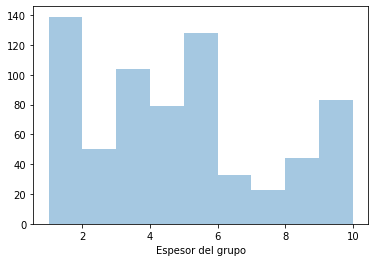

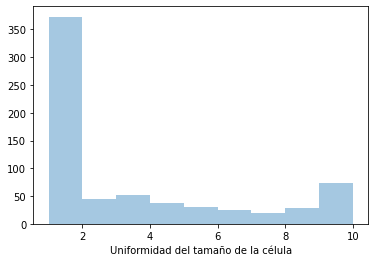

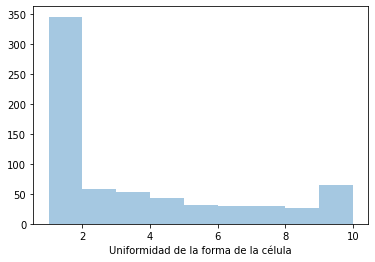

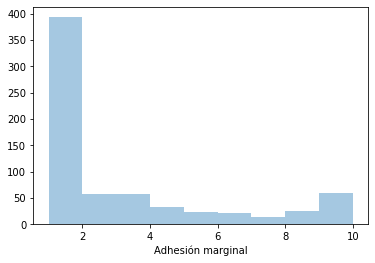

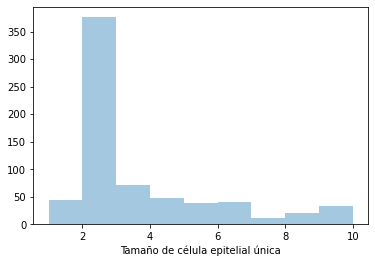

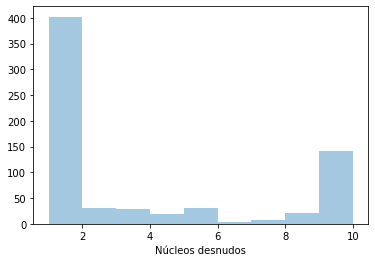

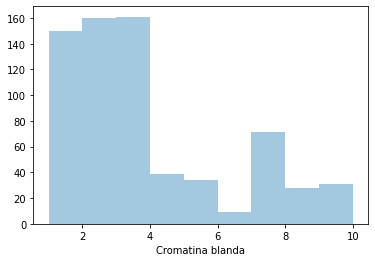

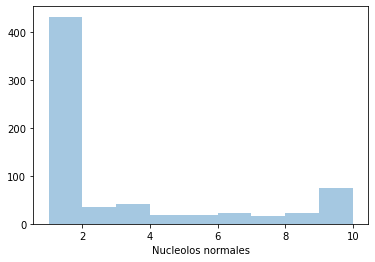

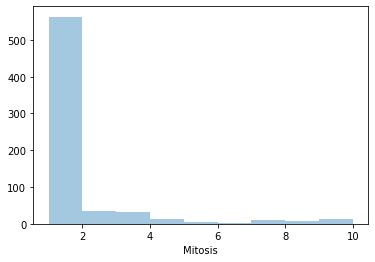

In [30]:
for i in columnas:
    sns.distplot(a = datos[i], bins=[1,2,3,4,5,6,7,8,9,10], kde= False)
    plt.show()


La mayoría de nuestras gráficas tienen una **mayor distribución** de los datos **entre 1 y 5**. Esto posiblemente se deba a que la mayoría (65%) son benignos, y se corresponden a valores menores de las características. Vamos a graficar ahora cada variable y su clase:

In [31]:
datos["Clase"] = datos["Clase"].replace({0:"benigno", 1:"maligno"})

C:\Users\adria\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


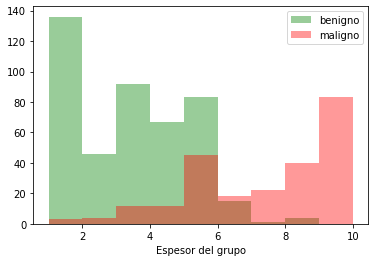

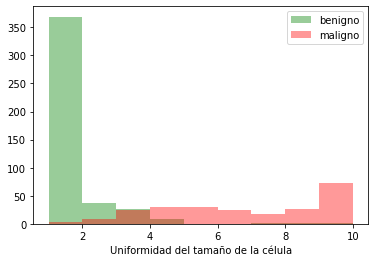

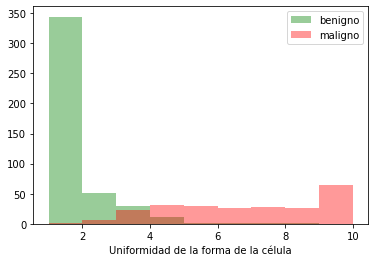

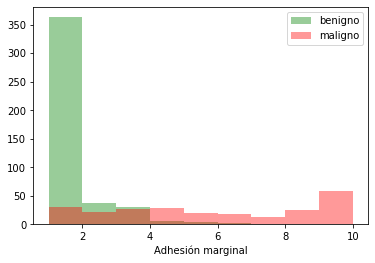

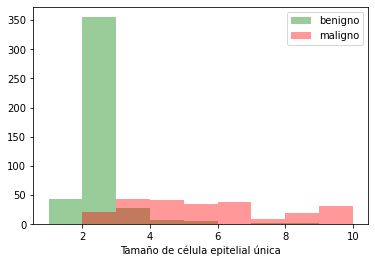

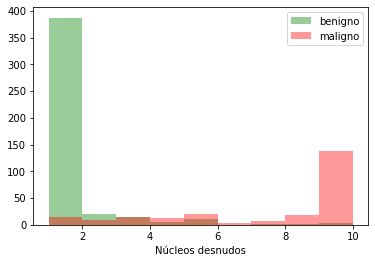

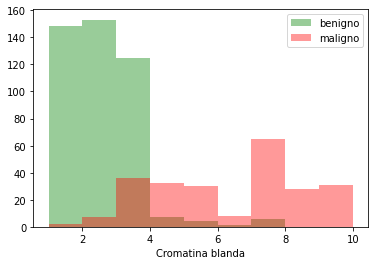

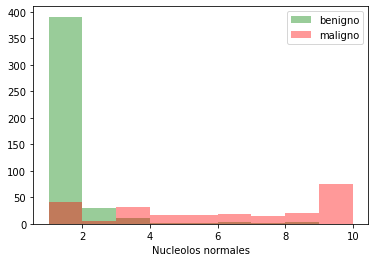

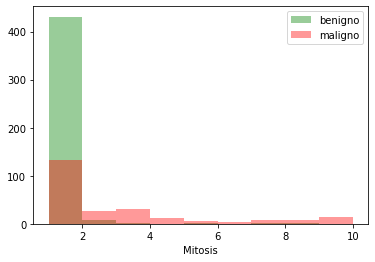

In [32]:
datosb = datos [datos.Clase == "benigno"]
datosm = datos [datos.Clase == "maligno"]

for i in columnas:
    sns.distplot(a = datosb[i], bins=[1,2,3,4,5,6,7,8,9,10], kde= False, color= "Green", label = datosb.Clase)
    sns.distplot(a = datosm[i], bins=[1,2,3,4,5,6,7,8,9,10], kde= False, color= "Red", label = datosm.Clase) 
    plt.legend()
    plt.show()

Efectivamente, los tumores **benignos** son los de valores **menores** claramente, mientras que los **malignos** hay **más variabilidad**, habiendo **ligeramente más en los valores mayores**, excepto en algunos casos. Destaca de sobremanera la columna "Mitoses", y en el resto, excepto "Espesor del grupo" y "Núcleos desnudos", mantienen unos valores similares, como si el valor no influyese en ser maligno. Estudiemos estos casos:

#### Columna "Mitosis"

Comencemos con la columna "Mitosis". Esta nos ha llamado la atención pues la mayoría de casos malignos están en 1. Posiblemente se deba, a que la **mayoría de los casos están en 1**, indepedientemente de que sean benignos o malignos. En concreto, 579 de 683. Esto es:

In [33]:
datos.Mitosis[datos.Mitosis == 1].count() / datos.Mitosis.count() * 100

82.43045387994144

Un **82 %** de los datos de Mitoses están en 1. Ahora veamos  cuántos de estos, en proporción, son benignos y malignos:

In [34]:
datosb.Mitosis.value_counts().sort_index()

1    431
2      8
3      2
5      1
7      1
8      1
Name: Mitosis, dtype: int64

In [35]:
datosm.Mitosis.value_counts().sort_index()

1     132
2      27
3      31
4      12
5       5
6       3
7       8
8       7
10     14
Name: Mitosis, dtype: int64

In [36]:
print("Porcentaje de casos de Mitosis = 1 malignos sobre el total: \t\t\t", 
      datosm.Mitosis[datosm.Mitosis==1].count() / datos.Mitosis[datos.Mitosis==1].count() * 100 )
print("Porcentaje de casos de Mitosis = 1 malignos sobre el total de casos malignos:   ",
      datosm.Mitosis[datosm.Mitosis==1].count()/datosm.Mitosis.count()*100)

Porcentaje de casos de Mitosis = 1 malignos sobre el total: 			 23.44582593250444
Porcentaje de casos de Mitosis = 1 malignos sobre el total de casos malignos:    55.23012552301255


El **23.44%** de los valores de **"Mitosis"**  son  **de valor 1 y malignos**. Por tanto, podríamos decir que se mantiene **"lo esperado"** (en el sentido de que esta columna no sea la más relevante directamente). 
Además, más de la mitad de los datos malignos son de este grupo (Mitosis = 1). 

Puede que está característica no nos resulte muy útil a la hora de predecir los resultados.

#### Columna "Espesor del grupo"

De esta columna, al igual que la de "Núcleos desnudos", la hemos destacado porque no sigue el mismo "patrón" que el resto de las columnas. En este caso, tenemos una variedad mayor en cuanto a los datos, pero podemos afirmar que la gran mayoría de valores **benignos** están **entre 1 y 5** y los **malignos entre 5 y 10**.

#### Columna "Núcleos desnudos"

Para esta columna, claramente, los valores **malignos** están en **10**, y los **benignos** en **1**, habiendo unos pocos de malignos y benignos entre medias.

#### Resto de columnas 

En el resto de columnas, podemos decir, que más o menos siguen un mismo patrón. Aquí, los valores **benignos** toman su mayoría los valores más pequeños, **entre 1 y 3**. En cambio, para los **malignos no está nada claro**. En general, si parece hay más en los valores más altos, pero no con una diferencia tan clara como en los casos anteriores.

<a name='4'></a>
## 4. Red Neuronal Retroalimentada

In [37]:
X_np = np.array(X)
Y_np = np.array(Y).reshape(Y.shape[0],-1)

In [38]:
print("Dimensiones de X : " + str(X_np.shape))
print("Dimensiones de Y : " + str(Y_np.shape))

Dimensiones de X : (683, 9)
Dimensiones de Y : (683, 1)


<a name='4-1'></a>
### 4.1 División de datos en conjunto de entrenamiento y validación.

Realizaremos la división de nuestro conjunto de datos en entrenamiento y validación en proporción 70 / 30.

In [39]:
from sklearn.model_selection import train_test_split
train_X,val_X,train_Y,val_Y = train_test_split ( X_np, Y_np , random_state=0, test_size = 0.3)
train_X,val_X,train_Y,val_Y = train_X.T,val_X.T,train_Y.T,val_Y.T
print("Dimensiones del conjunto de entrenamiento X : " + str(train_X.shape))
print("Dimensiones del conjunto de entrenamiento Y : " + str(train_Y.shape))

Dimensiones del conjunto de entrenamiento X : (9, 478)
Dimensiones del conjunto de entrenamiento Y : (1, 478)


<a name='4-2'></a>
### 4.2 Funciones de activación.

Primero se definen las funciones de activación y sus derivadas, para su posterior uso tanto en la propagación hacia delante (las funciones) como hacia atrás (las derivadas).

In [40]:
def sigmoid(x):
    """
    Implementa la función sigmoide para número reales.
    
    Argumentos de entrada:
    x --  Variable independiente, un escalar
    
    Salidas:
    a -- Valor de la función sigmoide en x, a = sigmoid(x), un escalar
    x -- Variable independiente, un escalar
    """
    a = 1/ (1 + np.exp(-x))
    return a,x

def sigmoid1(x):
    """
    Implementa la función sigmoide para número reales devolviendo solo la función.
    
    Argumentos de entrada:
    x -- Variable independiente, un escalar
    
    Salidas:
    a -- Valor de la función sigmoide en x, a = sigmoid(x), un escalar 
    """
    a = 1/ (1 + np.exp(-x))
    return a

def relu(x):
    """
    Implementa la función relu para número reales o para matrices .
    
    Argumentos de entrada:
    x -- Variable dependiente, un escalar o una matriz de números
    
    Salidas:
    a -- Valor de la función sigmoide en x, a = sigmoid(x), un escalar  o una matriz de números
    x -- Variable dependiente, un escalar o una matriz de números
    """
    if type(x) == np.ndarray:
        a = np.copy(x)
        for i in range(a.shape[0]):
            for j in range(a.shape[1]):
                if a[i,j] < 0:
                    a[i,j] = 0
    else:
        if x>0:
            a = x
        else:
            a = 0
    
    return a,x

In [41]:
def sigmoid_retro(dA,z):
    """
    Implementa el producto entre el gradiente de la función error respecto de la salida de la última neurona por
    la derivada de la función sigmoide (para número reales).
    
    Argumentos de entrada:
    dA --Gradiente de la función error respecto de la activación.
    z -- Valor de la parte lineal de la neurona.
    
    Salidas:
    dZ*dA -- Derivada de la función coste respecto de Z
    """
    dZ= sigmoid1(z)*(1-sigmoid1(z))
    return dZ*dA


def relu_retro(dA,z):
    """
    Implementa el producto entre el gradiente de la función error respecto de la salida de la capa actual (capa l) por
    la derivada de la función relu (para número reales o matrices).
    
    Argumentos de entrada:
    dA --Gradiente de la función error respecto de la activación, un escalar o una matriz
    z -- Valor de la parte lineal de la neurona, un escalar o una matriz
    
    Salidas:
    dZ*dA -- Derivada de la función coste respecto de Z (de la capa l)
    """
    if type(z) == np.ndarray:
        dZ = np.copy(z)
        for i in range(dZ.shape[0]):
            for j in range(dZ.shape[1]):
                if dZ[i,j] > 0:
                    dZ[i,j] = 1
                else:
                    dZ[i,j] = 0
    else:
        if z>0:
            dZ = 1
        else:
            dZ = 0
    
    return dZ*dA

<a name='4-3'></a>
### 4.3 Propagación hacia delante.

Inicializamos los parámetros (pesos y sesgos) de las distintas capas de manera aleatoria.

In [42]:
def inicializar_parametros_aleatorios(dim_capas):
    """
    Implementa la inicialización aleatoria de los parámetros de nuestra red neuronal de L capas , es decir, 
    dar valor a W1, b1, W2, b2, ..., WL,bL (W's y b's) dadas el número de neuronas en cada capa.
    Argumentos de entrada::
    dim_capas -- lista formada por las dimensiones de cada capa(número de neuornas) incluyendo la capa 0
                 del tipo (n_x, n_h1, n_h2,...,n_h(L-1), n_y).
    
    Returns:
    param -- diccionario de Python formado por "W1", "b1", ..., "WL", "bL":
                    Wl -- matriz de pesos de dimensión (dim_capa[l], dim_capa[l-1]).
                    bl -- vector sesgo de dimensión (dim_capa[l], 1).
    """
    
    np.random.seed(3)
    param = {}
    L = len(dim_capas) # número de capas de la red neuronal (incluyendo la capa 0, realmente sería L+1)

    for l in range(1, L):
        
        param['W' + str(l)] = np.random.randn(dim_capas[l],dim_capas[l-1])*0.1
        param['b' + str(l)] = np.zeros((dim_capas[l],1))
        
        assert(param['W' + str(l)].shape == (dim_capas[l], dim_capas[l - 1]))
        assert(param['b' + str(l)].shape == (dim_capas[l], 1))

        
    return param

#### Propagación hacia delante

In [43]:
def prop_lin(A, W, b):
    """
    Implementa la parte lineal de la propagación hacia delante de una capa.

    Argumentos de entrada:
    A -- Array de numpy de salidas de la capa anterior (o de la capa de entrada),
         de dimensiones (dim_capa_anterior, número de muestras).
    W -- Matriz de pesos en forma de array numpy de dimensión (dim_capa_actual, dim_capa_anterior).
    b -- Vector de sesgos en forma de array numpy de dim (dim_capa_actual, 1).

    Salidas:
    Z -- Sumatorio lineal que sirve de entrada para la función no lineal o de activación de dim (dim_capa_actual, número de muestras)
    cache -- Tupla de Python que contiene "A", "W" and "b" ; que se guarda para la retro-propagación
    """
    Z = np.dot(W, A) + b

    cache = (A, W, b)
    
    return Z, cache

In [44]:
def prop_delante(A_prev, W, b, activacion):
    """
    Implementa la propagación hacia delante en una capa (parte lineal y no lineal).

    Arguments:
    A_prev -- Array de numpy de salidas de la capa anterior (o de la capa de entrada),
              de dimensiones (dim_capa_anterior, número de muestras).
    W -- Matriz de pesos en forma de array numpy de dimensión (dim_capa_actual, dim_capa_anterior).
    b --  Vector de sesgos en forma de array numpy de dim (dim_capa_actual, 1)
    activation -- la función de activación de dicha capa, guarda en forma de cadena de caracteres: "sigmoid" or "relu".

    Returns:
    A -- Salida de la función de activación, de dimensiones (dim_capa_actual, número de muestras).
    cache -- Tupla de Python que contiene el "cache" de la parte lineal y de la parte no lineal,
             (A,W,b,Z), que usaremos en la retro-propagación.
    """
   
    if activacion == "sigmoid":
        
        Z, cache_lin = prop_lin(A_prev, W, b)
        
        A, cache_act = sigmoid(Z)
        
    
    elif activacion == "relu":
        
        Z, cache_lin = prop_lin(A_prev, W, b)
        
        A, cache_act = relu(Z)
        
        
    cache = (cache_lin, cache_act)

    return A, cache

In [45]:
def modelo_prop(X, param):
    """
    Implementa la propagación hacia delante de L-1 capas con función de activación relu y
    en la capa final función de activación sigmoide.
    
    Argumentos de entrada:
    X -- Variables de entrada de la red, datos, en forma de array de numpy de dim (num_variables_entrada , número de muestras).
    param -- Salida de inicializar_parametros_aleatorios().
    
    Returns:
    AL -- Salida de la última capa, de dimensión (dim_capa_final, número de muestras).
    caches -- Lista de caches que contienen todos los caches de prop_delante() desde 1 hasta L-1 .
    """

    caches = []
    A = X
    L = len(param) // 2                  # número de capas de la red
    
    for l in range(1, L):
        A_prev = A 
        
        A, cache = prop_delante(A_prev, param['W' + str(l)], param['b' +str(l)],"relu")
        caches.append(cache)

    AL, cache = prop_delante(A, param['W' + str(L)], param['b' + str(L)],"sigmoid")
    caches.append(cache)
          
    return AL, caches

Función a optimizar, función error o función de coste.

In [46]:
def funcion_coste(AL, Y):
    """
    Implementa la función coste que se minimizará con el algoritmo del descenso de gradiente.

    Argumentos de entrada:
    AL -- Vector que contiene las predicciones de la variable objetivo Y con el modelo_prop de dim (1, número de muestras).
    Y -- Vector con las variables objetivos reales, de dim (1, número de muestras).

    Salidas:
    coste -- Valor de la función de coste.
    """
    
    m = Y.shape[1]

    
    coste = - np.sum(Y*np.log(AL) + (1 - Y) * np.log(1 - AL)) / m
    
    coste = np.squeeze(coste)      # Para asegurarse de que devuelve la dimensión adecuada (por ejemplo, pasa [[17]] a 17).

    
    return coste

In [47]:
def funcion_coste_reg(AL, Y, param, lambd):
    
    """
    Implementa la función de coste a minimizar con descenso de gradiente con regularización L2.
    
    Argumentos de entrada:
    AL -- Vector que contiene las predicciones de la variable objetivo Y con el modelo_prop de dim (1, número de muestras).
    Y -- Vector con las variables objetivos reales, de dim (1, número de muestras).
    param -- Diccionario de Python con los parametros del modelo.
    lambd -- Parámetro de regularización.
     
    Returns:
    coste - Valor de la función de coste con regularización.
    """
    m = Y.shape[1]
    norma = 0
    for i in param.keys():
        norma += np.sum(np.square(param[i]))
     
    coste_sin_reg = funcion_coste(AL, Y) 

    coste_reg_L2 = (lambd/(2*m))*(norma)

    coste = coste_sin_reg + coste_reg_L2
    
    return coste


<a name='4-4'></a>
### 4.4 Retro-propagación

#### Propagación hacia atrás

In [48]:
def retro_lin(dZ, cache):
    """
    Implementa la retro-propagación de la parte lineal de una capa.

    Argumentos de entrada:
    dZ -- Gradiente del coste con respecto a la salida lineal de la capa actual (capa l).
    cache -- Tupla de valores (A_prev, W, b) de la parte de propagación hacia dealnte de la capa actual (capa l).

    Salidas:
    dA_prev -- Gradiente del coste con respecto a la activación de la capa anterior (capa l-1), de igual dimensión que A_prev.
    dW -- Gradiente del coste con respecto a W de la capa actual(capa l), de igual dimensión que W.
    db -- Gradiente del coste con respecto de b de la capa actual(capa l),de igual dimensión que b.
    """

    A_prev, W, b = cache
    m = A_prev.shape[1]

    
    dW = np.dot(dZ,A_prev.T) / m
    db = np.sum(dZ, axis = 1, keepdims = True) / m 
    dA_prev = np.dot( W.T, dZ)
    
    return dA_prev, dW, db

In [49]:
def retro_lin_reg(dZ, cache, lambd):
    """
    Implementa la retro-propagación de la parte lineal de una capa con regularización.

    Argumentos de entrada:
    dZ -- Gradiente del coste con respecto a la salida lineal de la capa actual (capa l).
    cache -- Tupla de valores (A_prev, W, b) de la parte de propagación hacia dealnte de la capa actual (capa l).
    lambd -- Coeficiente de regularización lambda, un escalar.

    Salidas:
    dA_prev -- Gradiente del coste con respecto a la activación de la capa anterior (capa l-1), de igual dimensión que A_prev.
    dW -- Gradiente del coste con respecto a W de la capa actual(capa l), de igual dimensión que W.
    db -- Gradiente del coste con respecto de b de la capa actual(capa l),de igual dimensión que b.
    """

    A_prev, W, b = cache
    m = A_prev.shape[1]

    
    dW = np.dot(dZ,A_prev.T) / m +  W*lambd/ m 
    db = np.sum(dZ, axis = 1, keepdims = True) / m
    dA_prev = np.dot( W.T, dZ)
    
    return dA_prev, dW, db

In [50]:
def retro_act_lin(dA, cache, activacion):
    """
    Implementa la retro-propagación de una capa l(parte no lineal y lineal).
    
    Argumentos de entrada:
    dA -- Gradiente del coste con respecto a la salida  la capa anterior (realmente posterior) (capa l+1).
    cache -- Tupla de valores (cache_lin, cache_act), donde cache_lin = (A_pre,W,b) y de cache_act = Z.
    activacion -- La función de activación que usaremos, en forma de cadena de caracteres (string): "sigmoid" o "relu".
    
    Salidas:
    dA_prev -- Gradiente del coste con respecto a la activación de la capa anterior (capa l-1), de igual dimensión que A_prev.
    dW -- Gradiente del coste con respecto a W de la capa actual(capa l), de igual dimensión que W.
    db -- Gradiente del coste con respecto a b de la capa actual(capa l), de igual dimensión que b.
    """
    cache_lin , cache_act = cache
    
    if activacion == "relu":
        
        dZ = relu_retro(dA, cache_act)
        dA_prev, dW, db = retro_lin(dZ, cache_lin)

        
    elif activacion == "sigmoid":
        
        dZ = sigmoid_retro(dA, cache_act)
        dA_prev, dW, db = retro_lin(dZ, cache_lin)
        
    
    return dA_prev, dW, db

In [51]:
def retro_act_lin_reg (dA, cache,  activacion, lambd = 0.1): 
    """ 
    Implementa la retro-propagación de una capa l(parte no lineal y lineal) con regularización.
    
    Argumentos de entrada:
    dA -- Gradiente del coste con respecto a la salida  la capa anterior (realmente posterior) (capa l+1).
    cache -- Tupla de valores (cache_lin, cache_act), donde cache_lin = (A_pre,W,b) y de cache_act = Z.
    activacion -- La función de activación que usaremos, en forma de cadena de caracteres (string): "sigmoid" o "relu".
    lambd -- Coeficiente de regularización lambda, un escalar
    
    Salidas:
    dA_prev -- Gradiente del coste con respecto a la activación de la capa anterior (capa l-1), de igual dimensión que A_prev.
    dW -- Gradiente del coste con respecto a W de la capa actual(capa l), de igual dimensión que W.
    db -- Gradiente del coste con respecto a b de la capa actual(capa l), de igual dimensión que b.
    """ 
    m = X.shape[1]
    L = len(cache)
    gradientes = {}
    cache_lin , cache_act = cache
    
    if activacion == "relu":
        dZ = relu_retro(dA, cache_act)
        dA_prev, dW, db = retro_lin_reg(dZ, cache_lin ,lambd)

        
    elif activacion == "sigmoid":
        
        dZ = sigmoid_retro(dA, cache_act)
        dA_prev, dW, db = retro_lin_reg(dZ, cache_lin,lambd)
    
    return dA_prev, dW, db

In [52]:
def modelo_retro(AL, Y, caches, regularizacion = False, lambd = 0.1):
    """
    Implementa la retropropagación de una red de L capas, con las primeras L-1 capas
    tienen de función de activación la función relu, la última capa, la función sigmoide.
    
    Argumentos de entrada:
    AL -- Vector que es la salida de la propagación hacia adelante (o salida de la red neuronal completa)
    ,en este caso, de la función (modelo_prop()).
    Y -- Vector que contiene los valores verdaderos que deben predecir la red neuronal, de dim (1, número de muestras).
    caches -- List de caches:
                todos los caches de prop_delante() con la activación "relu" (en total L-1).
                el cache de prop_delante() con la activación "sigmoid" (el de la capa L).
    
    Salidas:
    grads -- Un diccionario con los gradientes que usaremos para actualizar los parámetros (W's y b's) de la forma:
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # número de capas
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) 
    

    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) / m
    

    # Capa L: gradientes (SIGMOID -> LINEAL). 
    
    cache_actual = caches[L-1]
    if regularizacion:
        dA_prev_temp, dW_temp, db_temp = retro_act_lin_reg(dAL, cache_actual, "sigmoid",lambd)
    else:
        dA_prev_temp, dW_temp, db_temp = retro_act_lin (dAL, cache_actual, "sigmoid")
    grads["dA" + str(L-1)] = dAL
    grads["dW" + str(L)] = dW_temp
    grads["db" + str(L)] = db_temp

    
    # Bucle desde  l=L-2 hasta l=0
    for l in reversed(range(L-1)):
        
        # Capa l: gradientes (RELU -> LINEAL)
        cache_actual = caches[l]
        if regularizacion :
            dA_prev_temp, dW_temp, db_temp = retro_act_lin_reg(grads["dA" + str(l + 1)], cache_actual,"relu",lambd)
        else:
            dA_prev_temp, dW_temp, db_temp = retro_act_lin(grads["dA" + str(l + 1)], cache_actual,"relu")
            
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [53]:
def actualizar_params(params, grads, tasa_aprendizaje):
    """
    Implementa la actualización de los parámetros con descenso de gradiente.
    
    Argumentos de entrada:
    params -- Diccionario de python que contiene los parámetros.
    grads -- Diccionario de python que contiene los gradientes, salida de  modelo_retro.
    tasa_aprendizaje -- Tasa de aprendizaje del descenso de gradiente, un escalar.
    
    Salidas:
    parametros -- Diccionario de python que contiene los parámetros actualizados de la forma:
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    parametros = params.copy()
    L = len(parametros) // 2 # Número de capas

    for l in range(L):
        
        parametros["W" + str(l+1)] = params["W" + str(l+1)] - tasa_aprendizaje * grads["dW" + str(l+1)]
        parametros["b" + str(l+1)] = params["b" + str(l+1)] - tasa_aprendizaje * grads["db" + str(l+1)]
        
    return parametros

<a name='4-5'></a>
### 4.5 Modelo completo

Utilizando todas las anteriores funciones definidas, definimos la función de la red neuronal retroalimentada completa. Esta puede añadir la regularización L2 si así se desea.

In [54]:
def Red_Neuronal(X, Y, dim_capas, tasa_aprendizaje = 0.0075, num_iter = 3000,
                  print_cost=False, regularizacion = False, lambd = 0.1):
    """
    Implementa una red neuronal retroalimentada de L capas (la primera capa no se cuenta, l = 0) teniendo las 
    primeras L-1 capas como función de activación la función relu, y la última capa (capa L) la función sigmoide.
    
    Argumentos de entrada:
    X -- Datos o conjunto de entradas de dimensión (num_variables_entrada, número de muestras).
    Y -- Variable objetivo o a predecir,  de dimensión (1, número de muestras)).
    dim_capas -- Lista de Python de dimensión (número de capas + 1) que contiene el número de neuronas de cada capa
        (incluyendo las variables de entrada, la capa 0).
    tasa_aprendizaje -- Tasa de aprendizaje del algoritmo de descenso de gradiente, un escalar.
    num_iter -- Número de iteraciones en las que se actualizarán/optimizarán los parámetros del modelo, un escalar.
    print_cost -- Toma valor True o False si se desea imprimir por pantalla el coste cada 100 iteraciones.
    
    Salidas:
    parametros -- Diccionario de Python formado por "W1", "b1", ..., "WL", "bL", los parámetros de la red neuronal.
    costes -- Lista de Python de los valores de la función coste (cada 100 iteraciones).
    """

    np.random.seed(1)
    costes = []                         # lista para guardar costes
    
    parametros = inicializar_parametros_aleatorios(dim_capas)
    
    # Bucle (del descenso de gradiente)
    for i in range(0, num_iter+1):
        
        AL, caches = modelo_prop(X, parametros)
        
        if regularizacion:
            coste = funcion_coste_reg(AL, Y, parametros, lambd)
        else:
            coste = funcion_coste(AL, Y)
        
        grads = modelo_retro(AL, Y, caches,regularizacion,lambd)
        
        parametros = actualizar_params(parametros, grads, tasa_aprendizaje)
                
        # Mostrar el coste cada 100 iteraciones
        if print_cost and i % 100 == 0 :
            print("Coste después de la iteración {}: {}".format(i, np.squeeze(coste)))
        if i % 100 == 0 :
            costes.append(coste)
    
    return parametros, costes

Para completar el estudio, se define una función que usaremos para poder desarrollar una red neuronal retroalimentada que use el descenso de gradiente estocástico (SGD o Stocastic Gradient Descent).

In [55]:
def SGD_muestras(X,Y,AL,num = 20):
    
    X_n = X.copy()
    Y_n = Y.copy()
    AL_n = AL.copy()
    
    indices = np.arange(0,X.shape[1])
    np.random.seed(1)
    np.random.shuffle(indices)
    h = indices.shape[0]//num
    
    for i in range(num+1):
        if i != num:
            sub = indices[i*h : (i+1)*h]
            X_n[:,i*h : (i+1)*h] = X[:,sub]
            Y_n[:,i*h : (i+1)*h] = Y[:,sub]
            AL_n[:,i*h : (i+1)*h]= AL[:,sub]
        else:
            sub = indices[i*h : ]
            X_n[: , i*h : ] = X[:,sub]
            Y_n[:, i*h : ] = Y[:,sub]
            AL_n[:, i*h : ] = AL[:,sub]
    return X_n, Y_n, AL_n, h, num

In [56]:
def SGD_muestras2(X,Y,num = 20):
    AL = np.zeros(Y.shape[1]).reshape(Y.shape[0],Y.shape[1])
    X_n = []
    Y_n = []
    AL_n = []
    indices = np.arange(0,X.shape[1])
    np.random.seed(1)
    np.random.shuffle(indices)
    h = indices.shape[0]//num
    for i in range(num+1):
        if i != num:
            sub = indices[i*h : (i+1)*h]
            X_n.append(X[:,sub])
            Y_n.append(Y[:,sub])
            AL_n.append(AL[:,sub])
        else:
            sub = indices[i*h : ]
            X_n.append(X[:,sub])
            Y_n.append(Y[:,sub])
            AL_n.append(AL[:,sub])
    return X_n, Y_n, AL_n, h , num

In [57]:
def Red_Neuronal_SGD(X, Y, dim_capas, tasa_aprendizaje = 0.0075, num_iter = 3000,
                  print_cost=False, regularizacion = False, lambd = 0.1):
    
    """
    Implementa una red neuronal retroalimentada de L capas (la primera capa no se cuenta, l = 0) teniendo las 
    primeras L-1 capas como función de activación la función relu, y la última capa (capa L) la función sigmoide,
    y habiendo utilizado el algoritmo de descenso de gradiente estocástico para su optimización.
    
    Argumentos de entrada:
    X -- Datos o conjunto de entradas de dimensión (num_variables_entrada, número de muestras).
    Y -- Variable objetivo o a predecir,  de dimensión (1, número de muestras)).
    dim_capas -- Lista de Python de dimensión (número de capas + 1) que contiene el número de neuronas de cada capa
        (incluyendo las variables de entrada, la capa 0).
    tasa_aprendizaje -- Tasa de aprendizaje del algoritmo de descenso de gradiente, un escalar.
    num_iter -- Número de iteraciones en las que se actualizarán/optimizarán los parámetros del modelo, un escalar.
    print_cost -- Toma valor True o False si se desea imprimir por pantalla el coste cada 100 iteraciones.
    
    Salidas:
    parametros -- Diccionario de Python formado por "W1", "b1", ..., "WL", "bL", los parámetros de la red neuronal.
    costes -- Lista de Python de los valores de la función coste (cada 100 iteraciones).
    """

    
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    dim_capas -- list containing the input size and each layer size, of length (number of layers + 1).
    tasa_aprendizaje -- learning rate of the gradient descent update rule
    num_iter -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costes = []                        
    
    parametros = inicializar_parametros_aleatorios(dim_capas)
    AL = np.zeros(Y.shape[1]).reshape(Y.shape[0],Y.shape[1])
        
    X_n, Y_n, AL_n, h, num = SGD_muestras(X, Y, AL, num = 5)     #SOBRA???????????
    
    # Loop (gradient descent)
    for i in range(0, num_iter+1):
        X_n, Y_n, AL_n, h, num = SGD_muestras(X_n, Y_n, AL_n, num = 5)  #BORRAR O NO??? Diría que es MEJOR ESTO QUE LO OTRO
        
        for j in range(num+1):
            
            
            if j != num:
                
                AL_n[:,j*h : (j+1)*h], caches = modelo_prop(X_n[:,j*h : (j+1)*h], parametros)
                
                if regularizacion:
                    coste = funcion_coste_reg(AL_n[:,j*h : (j+1)*h], Y_n[:,j*h : (j+1)*h], parametros, lambd)
                else:
                    coste = funcion_coste(AL_n[:,j*h : (j+1)*h], Y_n[:,j*h : (j+1)*h])
                
                grads = modelo_retro(AL_n[:,j*h : (j+1)*h], Y_n[:,j*h : (j+1)*h], caches,regularizacion,lambd)
                parametros = actualizar_params(parametros, grads, tasa_aprendizaje)
                
            else:
                AL_n[:, j*h : ], caches =  modelo_prop(X_n[:, j*h : ], parametros)
                
                if regularizacion:
                    coste = funcion_coste_reg(AL_n[:, j*h : ], Y_n[:, j*h : ], parametros, lambd)
                else:
                    coste = funcion_coste(AL_n[:, j*h : ], Y_n[:, j*h : ])
                
                grads = modelo_retro(AL_n[:, j*h : ], Y_n[:, j*h : ], caches,regularizacion,lambd)
                parametros = actualizar_params(parametros, grads, tasa_aprendizaje)
            
            
             # Mostrar el coste cada 100 iteraciones (LA HE COMENTADO PARA EVITAR SOBRECARGA)
            #if print_cost and i % 100 == 0 or i == num_iter - 1:
                #print("Coste después de la iteración {} : {}".format(j,  np.squeeze(cost)))
            #if i % 100 == 0 or i == num_iter:
                #costes.append(coste)
        
        if regularizacion:
            coste = funcion_coste_reg(AL_n, Y_n, parametros, lambd)
        else:
            coste = funcion_coste(AL_n, Y_n)
            
        # Mostrar el coste cada 100 épocas
        if print_cost and i % 100 == 0 :
            print("Coste (de todo el conjunto) tras la época {}: {}".format(i, np.squeeze(coste)))
        if i % 100 == 0 :
            costes.append(coste)
    
    return parametros, costes

In [58]:
def Red_Neuronal_SGD2(X, Y, dim_capas, tasa_aprendizaje = 0.0075, num_iter = 3000,
                  print_cost=False, regularizacion = False, lambd = 0.1):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    dim_capas -- list containing the input size and each layer size, of length (number of layers + 1).
    tasa_aprendizaje -- learning rate of the gradient descent update rule
    num_iter -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []     
    
    parameters = inicializar_parametros_aleatorios(dim_capas)
    
        
    X_n, Y_n, AL, h , num= SGD_muestras2(X, Y)
    
    # Loop (gradient descent)
    for i in range(0, num_iter):
        for j in range(len(X_n)):
            
            AL[j], caches = modelo_prop(X_n[j], parameters)
        
            if regularizacion:
                cost = funcion_coste_reg(AL[j], Y_n[j], parameters, lambd)
            else:
                cost = funcion_coste(AL[j], Y_n[j])
        
            grads = modelo_retro(AL[j], Y_n[j], caches,regularizacion,lambd)
        
            parameters = actualizar_params(parameters, grads, tasa_aprendizaje)
            
             # Mostrar el coste cada 100 iteraciones
            if print_cost and i % 100 == 0 or i == num_iter - 1:
                print("Coste después de la iteración {} : {}".format(j,  np.squeeze(cost)))
            if i % 100 == 0 or i == num_iter:
                costs.append(cost)
                
        if regularizacion:
            cost = funcion_coste_reg(AL, Y_n, parameters, lambd)
        else:
            cost = funcion_coste(AL, Y_n)
        if print_cost and i % 100 == 0 or i == num_iter - 1:
            print("Coste (de todo el conjunto) tras la época {}: {}".format(i, np.squeeze(cost)))
    
    return parameters, costs

Para finalizar, se define primero la función umbral, que consiste en transformar todos los valores por encima de cierto umbral en 1 y los que estén por debajo en 0.

In [59]:
def funcion_umbral(x):
    if type(x) == np.ndarray:
        a = np.copy(x)
        for i in range(a.shape[0]):
            for j in range(a.shape[1]):
                if a[i,j] < 0.65:
                    a[i,j] = int(0)
                else:
                    a[i,j] = int(1)
        a = np.array(a, dtype = np.int64)
    else:
        if x<0.65:
            a = 0
        else:
            a = 1
    
    return a
    

Ahora otra función que devuelva (y muestre se quiere) el cálculo de una serie de métricas de clasificación.

In [60]:
def metricas_clasificacion (AL,Y, print_m = True):
    """
    Implementa el cálculo de las métricas de clasificación : exactitud (accuracy), precisión (precision), 
    sensibilidad o tasa de positivos verdaderos(recall o sensitivity), , especificidad o tasa de 
    negativos verdaderos (specificity), métrica F1 (F1 score) y matriz de confusión.
    
    Argumentos de entrada:
    
    AL -- Valor de la variable objetivo predicha, un array de numpy.
    Y -- Valor real de la variable objetivo, otro array de numpy.
    print_m -- Si es True, imprime por pantalla los valores de las métricas mencionadas.
    
    Salidas:
    
    exactitud -- Escalar, valor de la métrica.
    precision -- Escalar, valor de la métrica.
    sensibilidad -- Escalar, valor de la métrica.
    especificidad -- Escalar, valor de la métrica.
    f1 -- Escalar
    
    """
    TP = 0                       #TP = Positivos Verdaderos (True Positive)
    TN = 0                       #TN = Negativos Verdaderos (True Negative)
    FP = 0                       #FP = Positivos Falsos (False Positive)
    FN = 0                       #FN = Negativos Falsos (False Negative)
    
    #Cálculo de TP,TN,FP,FN
    for i in range(AL.shape[1]):
        if AL[0,i] == 1 and Y[0,i] == 1:
            TP += 1
        elif AL[0,i] == 1 and Y[0,i] == 0:
            FP += 1
        elif AL[0,i] == 0 and Y[0,i] == 0:
            TN += 1
        elif AL[0,i] == 0 and Y[0,i] == 1:
            FN += 1
            
    #Cálculo de métricas

    exactitud = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    
    sensibilidad = TP / ( TP + FN) 
    especificidad = TN / (TN + FP)
    
    f1 = 2 * (precision*sensibilidad) / (precision + sensibilidad)
    
    #Mostrar por pantalla resultados
    if print_m:
        
        print("\nLa matriz de confusión es:\n")
        matriz = [ ["Real|", 0, TN , FP],
                  ["    |", 1, FN , TN ]]
     
        print ("{:<10}{:<10} {:<25}".format('','Predicción',''))
        print ("{:<10}{:<10} {:<25}".format('','__________',''))

        print ("{:<5}{:<5}{:<5} {:<25}".format('','','0','1'))

        for i in matriz:
            a,b,c,d = i
            print ("{:<5}{:<5}{:<5} {:<25}".format( a,b,c,d))
        print("\nLas métricas tienen los siguientes valores:\n"
        "\t Exactitud: ", exactitud, "\n\t Precision: ", precision, "\n\t Sensibilidad: ", sensibilidad ,
        "\n\t Especificidad: ", especificidad, "\n\t F1 : ", f1)
    return exactitud, precision, sensibilidad, especificidad, f1

Finalmente, dados los conjuntos de variables de entrada y objetivo, y los parámetros, se calculan las métricas.

In [61]:
def predice(X,Y,parametros, print_m = True):
    """
    Función que devuelve la predicción del conjunto X con los parametros, y los compara según una métrica dada
    
    Argumentos de entrada:
    
    X- datos, array numpy de dimensión (n_x = entradas, m = número de muestras).
    Y -variable objetivo o salida "real", array numpy de dimensión (n_y (=1 normalmente), m).
    parametros- diccionario python conteniendo los parámetros (W's y b's).
    print_m -- Si es True, imprime por pantalla los valores de las métricas mencionadas.
    
    Salidas:
    AL- variable objetivo predicha con el modelo, que será un array numpy de dimensión = dim(Y).
    metrica- valor de las métricas.
    """
    A, caches = modelo_prop(X, parametros)
    AL = funcion_umbral(A)
    metricas = metricas_clasificacion (AL,Y, print_m)    
    return AL, metricas

<a name='5'></a>
## 5. Aplicación

Vamos a guardar en una lista los parámetros que vamos a usar para utilizar en distintos modelos:

In [62]:
PARAMETROS_DEFINITIVOS = []

<a name='5-1'></a>
### 5.1 Red Neuronal Retroalimentada de L = 3 capas

Comenzamos con L=3 capas, y, por ejemplo, las siguientes neuronas por capa (incluyendo la capa l = 0 ):

In [63]:
dim_capas = [train_X.shape[0],5,3,1]

Se va a realizar 2 tipos de redes: 

1) Redes con aprendizaje de lote completo o full-batch learning, esto es, se entrenará el conjunto de entrenamiento completo en cada iteración.

2) Redes con aprendizaje de mini-lote o mini-batch learning, esto es, se entranará con descenso de gradiente estocástico, en cada iteración entrenaremos una parte del conjunto total elegida aleatoriamente.

En ambos, comenzaremos ajustando la tasa de entrenamiento para finalmente comprobar si el modelo se ha sobreajustado. Además, estudiaremos el caso de ambas sin y con regularización, para ver si mejora o no la velocidad de aprendizaje o el sobre-ajuste.

#### 1)Aprendizaje  de  lote  completo  o  full-batch learning.

##### 1.1) Sin regularización

##### Ajuste de tasa de entrenamiento

Se desconoce cuál va a ser la **tasa de entrenamiento** óptima para que nuestro modelo ajuste los parámetros lo suficientemente bien, pero sin tardar demasiado tiempo. Para ello empezaremos entrenando una pequeña muestra de los datos, y a posterior una muestra mayor. En general, empezaremos con un valor pequeño, que iremos aumentando. En esta fase, no nos va a importar sobre-entrenar el modelo.

In [77]:
A0 = train_X[:,0:10]
Y0 = train_Y[:,0:10]

In [78]:
parametros, costes = Red_Neuronal(A0, Y0, dim_capas, tasa_aprendizaje = 0.001, num_iter = 500, print_cost = True)

Coste después de la iteración 0: 0.693203342374652
Coste después de la iteración 100: 0.6926918544987378
Coste después de la iteración 200: 0.692283319366608
Coste después de la iteración 300: 0.6918851967001706
Coste después de la iteración 400: 0.6914890132048143
Coste después de la iteración 500: 0.6910947574435442


In [79]:
parametros, costes = Red_Neuronal(A0, Y0, dim_capas, tasa_aprendizaje = 0.01, num_iter = 500, print_cost = True)

Coste después de la iteración 0: 0.693203342374652
Coste después de la iteración 100: 0.6891517083069532
Coste después de la iteración 200: 0.6854081052455535
Coste después de la iteración 300: 0.6818458061874026
Coste después de la iteración 400: 0.6784566658025373
Coste después de la iteración 500: 0.6752305282999854


In [80]:
parametros, costes = Red_Neuronal(A0, Y0, dim_capas, tasa_aprendizaje = 0.1, num_iter = 500, print_cost = True)

Coste después de la iteración 0: 0.693203342374652
Coste después de la iteración 100: 0.661025284703453
Coste después de la iteración 200: 0.6368878278624555
Coste después de la iteración 300: 0.5510733628301574
Coste después de la iteración 400: 0.43757603150828617
Coste después de la iteración 500: 0.3492370680814839


In [81]:
parametros, costes = Red_Neuronal(A0, Y0, dim_capas, tasa_aprendizaje = 1, num_iter = 500, print_cost = True)

Coste después de la iteración 0: 0.693203342374652
Coste después de la iteración 100: 0.6117168287167469
Coste después de la iteración 200: 0.6108760253452064
Coste después de la iteración 300: 0.6108644693200082
Coste después de la iteración 400: 0.6108643044519726
Coste después de la iteración 500: 0.6108643020892642


In [82]:
tasa_aprendizaje = [0.001,0.01,0.1,1]
n = 500
param = {}
cost = {}
for i in tasa_aprendizaje:
    #print("Con la tasa de aprendizaje = " + str(i))
    parametros, costes = Red_Neuronal(A0, Y0, dim_capas, tasa_aprendizaje = i, num_iter = n)
    param[i] = parametros
    cost[i] = costes[-1]
    #print("----____------______------______-----_____----\n")
print("\n ")
print("{}\t{}".format("Tasa de aprendizaje"," Costes tras " + str(n)+ " iteraciones"))
for a,b in cost.items():
    print("{:-11}\t\t {}".format(a,b))
print("\n")


 
Tasa de aprendizaje	 Costes tras 500 iteraciones
      0.001		 0.6910947574435442
       0.01		 0.6752305282999854
        0.1		 0.3492370680814839
          1		 0.6108643020892642




Ahora, se va a intentar ajustar utilizando el conjunto de entrenamiento entero. 

In [83]:
import time
inicio = time.time()
tasa_aprendizaje = [0.001,0.01,0.1,1]
n = 2000
param = {}
cost = {}
print("Red Neuronal \"normal\" ")
for i in tasa_aprendizaje:
    #print("Con la tasa de aprendizaje = " + str(i))
    parametros, costes = Red_Neuronal(train_X, train_Y, dim_capas, tasa_aprendizaje = i, num_iter = n)
    param[i] = parametros
    cost[i] = costes[-1]
    #print("----____------______------______-----_____----\n")
print("\n ")
print("{}\t{}".format("Tasa de aprendizaje"," Costes"))
for a,b in cost.items():
    print("{:-11}\t\t {}".format(a,b))
print("\n")
fin = time.time()
print("Tiempo de ejecución : \t " + str(fin-inicio))

Red Neuronal "normal" 

 
Tasa de aprendizaje	 Costes
      0.001		 0.6931691021201503
       0.01		 0.6921298585108653
        0.1		 0.6838534009658993
          1		 0.3418086851409991


Tiempo de ejecución : 	 85.33719038963318


Vamos a pobar con valores de tasa de entrenamiento entre entre 0.1 y 10

In [84]:
import time
inicio = time.time()
tasa_aprendizaje = [0.1,0.5,1,5, 10]
param = {}
cost = {}
print("Red Neuronal \"normal\" ")
for i in tasa_aprendizaje:
    #print("Con la tasa de aprendizaje = " + str(i))
    parametros, costes = Red_Neuronal(train_X, train_Y, dim_capas, tasa_aprendizaje = i, num_iter = 2000)
    param[i] = parametros
    cost[i] = costes[-1]
    #print("----____------______------______-----_____----\n")
print("\n ")
print("{}\t{}".format("Tasa de aprendizaje"," Costes"))
for a,b in cost.items():
    print("{:-11}\t\t {}".format(a,b))
print("\n")
fin = time.time()
print("Tiempo de ejecución : \t " + str(fin-inicio))

Red Neuronal "normal" 


C:\Users\adria\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
C:\Users\adria\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()
C:\Users\adria\anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide



 
Tasa de aprendizaje	 Costes
        0.1		 0.6838534009658993
        0.5		 0.6512453514736515
          1		 0.3418086851409991
          5		 0.1545933834403862
         10		 nan


Tiempo de ejecución : 	 104.10702180862427


El modelo que mejor funciona aparentemente es el de tasa de aprendizaje = 5. Veamos como se comporta:

In [87]:
parametros, costes = Red_Neuronal(train_X, train_Y, dim_capas, tasa_aprendizaje = 5, num_iter = 2000, print_cost = True)

Coste después de la iteración 0: 0.6933432574172309
Coste después de la iteración 100: 0.673070789269953
Coste después de la iteración 200: 0.6517533499738906
Coste después de la iteración 300: 0.4345197540899315
Coste después de la iteración 400: 0.34244961262432516
Coste después de la iteración 500: 0.2908700258595973
Coste después de la iteración 600: 0.2575013275003276
Coste después de la iteración 700: 0.23890360818058515
Coste después de la iteración 800: 0.21080849730028048
Coste después de la iteración 900: 0.5405302492378178
Coste después de la iteración 1000: 0.3534844185062379
Coste después de la iteración 1100: 0.20064203181657947
Coste después de la iteración 1200: 0.17281537612229986
Coste después de la iteración 1300: 0.1608193235618614
Coste después de la iteración 1400: 0.15332108325638474
Coste después de la iteración 1500: 0.14925166104182305
Coste después de la iteración 1600: 0.14544077368344843
Coste después de la iteración 1700: 0.1412241589403832
Coste después d

In [89]:
parametros, costes = Red_Neuronal(train_X, train_Y, dim_capas, tasa_aprendizaje = 2.5, num_iter = 2000, print_cost = True)

Coste después de la iteración 0: 0.6933432574172309
Coste después de la iteración 100: 0.6818143998798094
Coste después de la iteración 200: 0.6730772520823751
Coste después de la iteración 300: 0.6651224506789805
Coste después de la iteración 400: 0.6514106369871451
Coste después de la iteración 500: 0.579553884930274
Coste después de la iteración 600: 0.43281885720144625
Coste después de la iteración 700: 0.3759198539195912
Coste después de la iteración 800: 0.3419794124329365
Coste después de la iteración 900: 0.31331854800360015
Coste después de la iteración 1000: 0.29059450878120874
Coste después de la iteración 1100: 0.2722946617542971
Coste después de la iteración 1200: 0.2573567242109796
Coste después de la iteración 1300: 0.24644466970814963
Coste después de la iteración 1400: 0.2388622651777679
Coste después de la iteración 1500: 0.23006165314352334
Coste después de la iteración 1600: 0.22063270823386472
Coste después de la iteración 1700: 0.21277032350185482
Coste después de

El resultado converge de manera más uniforme con el valor 2.5, que es el que vamos a guardar.

In [90]:
PARAMETROS_DEFINITIVOS.append(parametros)

##### Estudio de infra-aprendizaje y sobre-aprendizaje

En primer lugar, vamos a observar el valor de las métricas sobre el conjunto de entrenamiento, con los que se deben obtener resultados buenos, para luego observarlos en los conjuntos de validación y observar si el modelo se sobre-ajusta al primer conjunto.

In [92]:
l = "\"normal\""

print("Red Neuronal Retroalimentada ", l )
AL, m = predice(train_X,train_Y,parametros)
print("\n----____------______------______-----_____----\n")
    

Red Neuronal Retroalimentada  "normal"

La matriz de confusión es:

          Predicción                          
          __________                          
          0     1                        
Real|0    309   5                        
    |1    9     309                      

Las métricas tienen los siguientes valores:
	 Exactitud:  0.9707112970711297 
	 Precision:  0.96875 
	 Sensibilidad:  0.9451219512195121 
	 Especificidad:  0.9840764331210191 
	 F1 :  0.95679012345679

----____------______------______-----_____----



Como cabía de esperar, debido al valor de la función error, el modelo se ajusta bien al conjunto de entrenamiento. En la matriz de confusión, los falsos positivos y negativos ( predice 1, real 0 y viceversa), son valores muy bajos, y así se refleja en todas las métricas, con valores cercanos a 1, que es lo que buscamos.

Podríamos ajustar el modelo para que la tasa de verdaderos positivos o sensibilidad; o la tasa de verdaderos negativos o especificidad, fueran lo mayor posible (maximizar una de ellas manteniendo la otra alta). Esto es, si la tasa de verdaderos positivos fuese 1 o prácticamente, podríamos asegurar que si el modelo da positivo, es casi seguro que el paciente es positivo, o viceversa (depederá de la situación que nos interese). Esto no lo vamos a hacer, pues se sale de los objetivos de este trabajo.

In [94]:
l = "\"normal\""


print("Red Neuronal Retroalimentada ", l)
AL, m = predice(val_X,val_Y,parametros)
print("\n----____------______------______-----_____----\n")
    

Red Neuronal Retroalimentada  "normal"

La matriz de confusión es:

          Predicción                          
          __________                          
          0     1                        
Real|0    126   4                        
    |1    9     126                      

Las métricas tienen los siguientes valores:
	 Exactitud:  0.9365853658536586 
	 Precision:  0.9428571428571428 
	 Sensibilidad:  0.88 
	 Especificidad:  0.9692307692307692 
	 F1 :  0.9103448275862068

----____------______------______-----_____----



Con el conjunto de validación los resultados siguen siendo realmente buenos. Esto quiere decir que nuestra red no se ha sobreajustado en exceso al conjunto de entrenamiento, y que puede generalizar bien. Aún con estos resultados, veremos como se comporta con regularización.

###### 1.2) Con regularización

##### Ajuste de tasa de entrenamiento

In [95]:
import time
inicio = time.time()
tasa_aprendizaje = [0.001,0.01,0.1,1]
n = 2000
param = {}
cost = {}
print("Red Neuronal con regularización ")
for i in tasa_aprendizaje:
    #print("Con la tasa de aprendizaje = " + str(i))
    parametros, costes = Red_Neuronal(train_X, train_Y, dim_capas, tasa_aprendizaje = i, num_iter = n, regularizacion = True)
    param[i] = parametros
    cost[i] = costes[-1]
    #print("----____------______------______-----_____----\n")
print("\n ")
print("{}\t{}".format("Tasa de aprendizaje"," Costes"))
for a,b in cost.items():
    print("{:-11}\t\t {}".format(a,b))
print("\n")
fin = time.time()
print("Tiempo de ejecución : \t " + str(fin-inicio))

Red Neuronal con regularización 

 
Tasa de aprendizaje	 Costes
      0.001		 0.6932451730763832
       0.01		 0.6922053576335767
        0.1		 0.6839242368910564
          1		 0.3557474712928939


Tiempo de ejecución : 	 82.11705136299133


Igual que antes, vamos a pobar con valores de tasa de entrenamiento entre entre 0.1 y 10.

In [96]:
import time
inicio = time.time()
tasa_aprendizaje = [0.1,0.5,1,5,10]
n = 2000
param = {}
cost = {}
print("Red Neuronal con regularización ")
for i in tasa_aprendizaje:
    #print("Con la tasa de aprendizaje = " + str(i))
    parametros, costes = Red_Neuronal(train_X, train_Y, dim_capas, tasa_aprendizaje = i, num_iter = n, regularizacion = True)
    param[i] = parametros
    cost[i] = costes[-1]
    #print("----____------______------______-----_____----\n")
print("\n ")
print("{}\t{}".format("Tasa de aprendizaje"," Costes"))
for a,b in cost.items():
    print("{:-11}\t\t {}".format(a,b))
print("\n")
fin = time.time()
print("Tiempo de ejecución : \t " + str(fin-inicio))

Red Neuronal con regularización 


C:\Users\adria\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
C:\Users\adria\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()
C:\Users\adria\anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\adria\anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
C:\Users\adria\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\adria\anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in multiply



 
Tasa de aprendizaje	 Costes
        0.1		 0.6839242368910564
        0.5		 0.6562700210576674
          1		 0.3557474712928939
          5		 0.2422598192235838
         10		 nan


Tiempo de ejecución : 	 114.34061121940613


In [97]:
parametros, costes = Red_Neuronal(train_X, train_Y, dim_capas, tasa_aprendizaje =5, num_iter = 2000, print_cost = True, regularizacion = True)

Coste después de la iteración 0: 0.6934196047553391
Coste después de la iteración 100: 0.6731470849756572
Coste después de la iteración 200: 0.6565044309547537
Coste después de la iteración 300: 0.48431843494353655
Coste después de la iteración 400: 0.356444068292874
Coste después de la iteración 500: 0.3046661138953783
Coste después de la iteración 600: 0.2714012383226049
Coste después de la iteración 700: 0.25125776601939936
Coste después de la iteración 800: 0.2397942625536391
Coste después de la iteración 900: 0.21318806350986452
Coste después de la iteración 1000: 0.6563451811898929
Coste después de la iteración 1100: 0.5155978017584902
Coste después de la iteración 1200: 0.3711044941477362
Coste después de la iteración 1300: 0.30123607373991956
Coste después de la iteración 1400: 0.2804575919836667
Coste después de la iteración 1500: 0.2672622014800249
Coste después de la iteración 1600: 0.2574800215384637
Coste después de la iteración 1700: 0.25110331052046975
Coste después de l

In [98]:
parametros, costes = Red_Neuronal(train_X, train_Y, dim_capas, tasa_aprendizaje = 2.5, num_iter = 2000, print_cost = True, regularizacion = True)

Coste después de la iteración 0: 0.6934196047553391
Coste después de la iteración 100: 0.6818840361709034
Coste después de la iteración 200: 0.6731551940878415
Coste después de la iteración 300: 0.6657076163997286
Coste después de la iteración 400: 0.6563677176870578
Coste después de la iteración 500: 0.6192254764327721
Coste después de la iteración 600: 0.48187559748223124
Coste después de la iteración 700: 0.39322659065008114
Coste después de la iteración 800: 0.35601126852227927
Coste después de la iteración 900: 0.3277050131749432
Coste después de la iteración 1000: 0.3044086344974817
Coste después de la iteración 1100: 0.28558923765217814
Coste después de la iteración 1200: 0.2712906541501961
Coste después de la iteración 1300: 0.25998487928864505
Coste después de la iteración 1400: 0.2512104524292507
Coste después de la iteración 1500: 0.24443404560413276
Coste después de la iteración 1600: 0.2398606601629196
Coste después de la iteración 1700: 0.23841147465798748
Coste después d

También es más "estable" el modelo con la tasa = 2.5 .

In [99]:
PARAMETROS_DEFINITIVOS.append(parametros)

##### Estudio de infra-aprendizaje y sobre-aprendizaje

In [100]:
l ="con regularización"

print("Red Neuronal Retroalimentada ", l )
AL, m = predice(train_X,train_Y,parametros)
print("\n----____------______------______-----_____----\n")

Red Neuronal Retroalimentada  con regularización

La matriz de confusión es:

          Predicción                          
          __________                          
          0     1                        
Real|0    305   9                        
    |1    3     305                      

Las métricas tienen los siguientes valores:
	 Exactitud:  0.9748953974895398 
	 Precision:  0.9470588235294117 
	 Sensibilidad:  0.9817073170731707 
	 Especificidad:  0.9713375796178344 
	 F1 :  0.9640718562874251

----____------______------______-----_____----



In [101]:
l = "con regularización"

print("Red Neuronal Retroalimentada ", l )
AL, m = predice(val_X,val_Y,parametros)
print("\n----____------______------______-----_____----\n")

Red Neuronal Retroalimentada  con regularización

La matriz de confusión es:

          Predicción                          
          __________                          
          0     1                        
Real|0    125   5                        
    |1    3     125                      

Las métricas tienen los siguientes valores:
	 Exactitud:  0.9609756097560975 
	 Precision:  0.935064935064935 
	 Sensibilidad:  0.96 
	 Especificidad:  0.9615384615384616 
	 F1 :  0.9473684210526316

----____------______------______-----_____----



De nuevo, los resultados son buenos con el conjunto de entrenamiento, y se observa una ligera mejoría con la regularización frente al sobre-aprendizaje. Los falsos positivos y negativos pasan de 4-9 a 5-3, lo que mejora  la sensibilidad.

Pasemos a la optimización por descenso de gradiente estocástico.

##### 2) Aprendizaje de mini-lote o mini-batch learning (Descenso de Gradiente Estocástico).

###### 2.1) Sin regularización

##### Ajuste de tasa de entrenamiento

In [102]:
import time
inicio = time.time()
tasa_aprendizaje = [0.001,0.01,0.1,1]
n = 2000
param = {}
cost = {}
print("Red Neuronal con descenso de gradiente estocástico ")
for i in tasa_aprendizaje:
    #print("Con la tasa de aprendizaje = " + str(i))
    parametros, costes = Red_Neuronal_SGD(train_X, train_Y, dim_capas, tasa_aprendizaje = i, num_iter = n)
    param[i] = parametros
    cost[i] = costes[-1]
    #print("----____------______------______-----_____----\n")
print("\n ")
print("{}\t{}".format("Tasa de aprendizaje"," Costes"))
for a,b in cost.items():
    print("{:-11}\t\t {}".format(a,b))
print("\n")
fin = time.time()
print("Tiempo de ejecución : \t " + str(fin-inicio))

Red Neuronal con descenso de gradiente estocástico 

 
Tasa de aprendizaje	 Costes
      0.001		 0.6784737953254122
       0.01		 0.2281431479434985
        0.1		 0.6441859959001907
          1		 0.6587510951092266


Tiempo de ejecución : 	 114.45216226577759


A diferencia de los anteriores, el comportamiento en tasa = 0.01 parece mucho mejor. Veámoslo:

In [103]:
parametros, costes = Red_Neuronal_SGD(train_X, train_Y, dim_capas, tasa_aprendizaje = 0.01, num_iter = n, print_cost = True)

Coste (de todo el conjunto) tras la época 0: 0.6933342613987905
Coste (de todo el conjunto) tras la época 100: 0.6851384299921891
Coste (de todo el conjunto) tras la época 200: 0.6782977661026768
Coste (de todo el conjunto) tras la época 300: 0.6730734469508428
Coste (de todo el conjunto) tras la época 400: 0.6674078627994994
Coste (de todo el conjunto) tras la época 500: 0.6586165832304933
Coste (de todo el conjunto) tras la época 600: 0.6318745466950431
Coste (de todo el conjunto) tras la época 700: 0.5405454309048937
Coste (de todo el conjunto) tras la época 800: 0.43667763286887945
Coste (de todo el conjunto) tras la época 900: 0.3927462779096023
Coste (de todo el conjunto) tras la época 1000: 0.35857282751142583
Coste (de todo el conjunto) tras la época 1100: 0.3423321278310244
Coste (de todo el conjunto) tras la época 1200: 0.31883147342284535
Coste (de todo el conjunto) tras la época 1300: 0.304697275387103
Coste (de todo el conjunto) tras la época 1400: 0.2854505381470681
Coste

In [104]:
PARAMETROS_DEFINITIVOS.append(parametros)

##### Estudio de infra-aprendizaje y sobre-aprendizaje

In [105]:
l = "con descenso de gradiente estocástico"

print("Red Neuronal Retroalimentada ", l )
AL, m = predice(train_X,train_Y,parametros)

print("\n----____------______------______-----_____----\n")

Red Neuronal Retroalimentada  con descenso de gradiente estocástico

La matriz de confusión es:

          Predicción                          
          __________                          
          0     1                        
Real|0    308   6                        
    |1    10    308                      

Las métricas tienen los siguientes valores:
	 Exactitud:  0.9665271966527197 
	 Precision:  0.9625 
	 Sensibilidad:  0.9390243902439024 
	 Especificidad:  0.9808917197452229 
	 F1 :  0.9506172839506174

----____------______------______-----_____----



In [106]:
l = "con descenso de gradiente estocástico"

print("Red Neuronal Retroalimentada ", l )
AL, m = predice(val_X,val_Y,parametros)

print("\n----____------______------______-----_____----\n")

Red Neuronal Retroalimentada  con descenso de gradiente estocástico

La matriz de confusión es:

          Predicción                          
          __________                          
          0     1                        
Real|0    126   4                        
    |1    10    126                      

Las métricas tienen los siguientes valores:
	 Exactitud:  0.9317073170731708 
	 Precision:  0.9420289855072463 
	 Sensibilidad:  0.8666666666666667 
	 Especificidad:  0.9692307692307692 
	 F1 :  0.9027777777777778

----____------______------______-----_____----



Al igual que en la red sin descenso de gradiente estocástico ni regularización, obtenemos resultados bastante buenos en cuanto al conjunto de entrenamiento, aunque en el de validación la sensibilidad es ligeramente mejorable. Veamos si se mejora con la regularización

###### 2.2) Con regularización

##### Ajuste de tasa de entrenamiento

In [107]:
import time
inicio = time.time()
tasa_aprendizaje = [0.001,0.01,0.1,1]
n = 2000
param = {}
cost = {}
print("Red neuronal con descenso de gradiente estocástico y regularización")
for i in tasa_aprendizaje:
    #print("Con la tasa de aprendizaje = " + str(i))
    parametros, costes = Red_Neuronal_SGD(train_X, train_Y, dim_capas, tasa_aprendizaje = i, 
                                          num_iter = n, regularizacion = True)
    param[i] = parametros
    cost[i] = costes[-1]
    #print("----____------______------______-----_____----\n")
print("\n ")
print("{}\t{}".format("Tasa de aprendizaje"," Costes"))
for a,b in cost.items():
    print("{:-11}\t\t {}".format(a,b))
print("\n")
fin = time.time()
print("Tiempo de ejecución : \t " + str(fin-inicio))

Red neuronal con descenso de gradiente estocástico y regularización

 
Tasa de aprendizaje	 Costes
      0.001		 0.678539356772218
       0.01		 0.24174353405202936
        0.1		 0.6442181208958084
          1		 0.6587727085545806


Tiempo de ejecución : 	 186.42528557777405


La tasa = 0.01 parece la mejor. Veámoslo:

In [108]:
parametros, costes = Red_Neuronal_SGD(train_X, train_Y, dim_capas, tasa_aprendizaje = 0.01, num_iter = n, 
                                      regularizacion = True, print_cost = True)

Coste (de todo el conjunto) tras la época 0: 0.6934105147510733
Coste (de todo el conjunto) tras la época 100: 0.6852052545714228
Coste (de todo el conjunto) tras la época 200: 0.6783688981011858
Coste (de todo el conjunto) tras la época 300: 0.6732328627590296
Coste (de todo el conjunto) tras la época 400: 0.6681797830677738
Coste (de todo el conjunto) tras la época 500: 0.6621223529072474
Coste (de todo el conjunto) tras la época 600: 0.6496250096251796
Coste (de todo el conjunto) tras la época 700: 0.6036508575483358
Coste (de todo el conjunto) tras la época 800: 0.4912882653552644
Coste (de todo el conjunto) tras la época 900: 0.41725252538113194
Coste (de todo el conjunto) tras la época 1000: 0.3775008586765459
Coste (de todo el conjunto) tras la época 1100: 0.3594675501365455
Coste (de todo el conjunto) tras la época 1200: 0.3356678202497911
Coste (de todo el conjunto) tras la época 1300: 0.31983293196519413
Coste (de todo el conjunto) tras la época 1400: 0.2998290996001227
Coste

In [109]:
PARAMETROS_DEFINITIVOS.append(parametros)

##### Estudio de infra-aprendizaje y sobre-aprendizaje

In [110]:
l = "con descenso de gradiente estocástico y regularización"

print("Red Neuronal Retroalimentada ", l )
AL, m = predice(train_X,train_Y,parametros)
print("\n----____------______------______-----_____----\n")

Red Neuronal Retroalimentada  con descenso de gradiente estocástico y regularización

La matriz de confusión es:

          Predicción                          
          __________                          
          0     1                        
Real|0    305   9                        
    |1    3     305                      

Las métricas tienen los siguientes valores:
	 Exactitud:  0.9748953974895398 
	 Precision:  0.9470588235294117 
	 Sensibilidad:  0.9817073170731707 
	 Especificidad:  0.9713375796178344 
	 F1 :  0.9640718562874251

----____------______------______-----_____----



In [111]:
l = "con descenso de gradiente estocástico y regularización"

print("Red Neuronal Retroalimentada ", l )
AL, m = predice(val_X,val_Y,parametros)
print("\n----____------______------______-----_____----\n")

Red Neuronal Retroalimentada  con descenso de gradiente estocástico y regularización

La matriz de confusión es:

          Predicción                          
          __________                          
          0     1                        
Real|0    126   4                        
    |1    5     126                      

Las métricas tienen los siguientes valores:
	 Exactitud:  0.9560975609756097 
	 Precision:  0.9459459459459459 
	 Sensibilidad:  0.9333333333333333 
	 Especificidad:  0.9692307692307692 
	 F1 :  0.9395973154362416

----____------______------______-----_____----



Análogamente a como se comporta en la redes con aprendizaje por lote completo. en las redes neuronales con descenso de gradiente estocástico, mejora ligeramente los resultados, frente al sobre-entrenamiento, cuando le añadimos la regularización L2.

#### Resumen de los resultados

In [112]:
l = ["\"normal\"", "con regularización","con descenso de gradiente estocástico",
     "con descenso de gradiente estocástico y regularización" ]
i = 0
for a in PARAMETROS_DEFINITIVOS:
    print("Red Neuronal Retroalimentada ", l[i] )
    AL, m = predice(train_X,train_Y,a)
    i +=1
    print("\n----____------______------______-----_____----\n")
    

Red Neuronal Retroalimentada  "normal"

La matriz de confusión es:

          Predicción                          
          __________                          
          0     1                        
Real|0    309   5                        
    |1    9     309                      

Las métricas tienen los siguientes valores:
	 Exactitud:  0.9707112970711297 
	 Precision:  0.96875 
	 Sensibilidad:  0.9451219512195121 
	 Especificidad:  0.9840764331210191 
	 F1 :  0.95679012345679

----____------______------______-----_____----

Red Neuronal Retroalimentada  con regularización

La matriz de confusión es:

          Predicción                          
          __________                          
          0     1                        
Real|0    305   9                        
    |1    3     305                      

Las métricas tienen los siguientes valores:
	 Exactitud:  0.9748953974895398 
	 Precision:  0.9470588235294117 
	 Sensibilidad:  0.9817073170731707 
	 Especificid

In [113]:
l = ["\"normal\"", "con regularización","con descenso de gradiente estocástico",
     "con descenso de gradiente estocástico y regularización" ]
i = 0
for a in PARAMETROS_DEFINITIVOS:
    print("Red Neuronal Retroalimentada ", l[i] )
    AL, m = predice(val_X,val_Y,a)
    i +=1
    print("\n----____------______------______-----_____----\n")

Red Neuronal Retroalimentada  "normal"

La matriz de confusión es:

          Predicción                          
          __________                          
          0     1                        
Real|0    126   4                        
    |1    9     126                      

Las métricas tienen los siguientes valores:
	 Exactitud:  0.9365853658536586 
	 Precision:  0.9428571428571428 
	 Sensibilidad:  0.88 
	 Especificidad:  0.9692307692307692 
	 F1 :  0.9103448275862068

----____------______------______-----_____----

Red Neuronal Retroalimentada  con regularización

La matriz de confusión es:

          Predicción                          
          __________                          
          0     1                        
Real|0    125   5                        
    |1    3     125                      

Las métricas tienen los siguientes valores:
	 Exactitud:  0.9609756097560975 
	 Precision:  0.935064935064935 
	 Sensibilidad:  0.96 
	 Especificidad:  0.961538461

<a name='5-2'></a>
### 5.2 Red Neuronal Retroalimentada de L= 5 capas

In [114]:
dim_capas5 = [train_X.shape[0],10,8,5,3,1]


In [115]:
PARAMETROS_DEFINITIVOS5 = []


#### Ajuste de tasa de entrenamiento

In [116]:
A0 = train_X[:,0:20]
Y0 = train_Y[:,0:20]

Empezamos con un subconjunto del conjunto de entrenamiento:


In [117]:
tasa_aprendizaje = [0.001,0.01,0.1,1,10,100]
n = 500
param = {}
cost = {}
for i in tasa_aprendizaje:
    #print("Con la tasa de aprendizaje = " + str(i))
    parametros, costes = Red_Neuronal(A0, Y0, dim_capas5, tasa_aprendizaje = i, num_iter = n)
    param[i] = parametros
    cost[i] = costes[-1]
    #print("----____------______------______-----_____----\n")
print("\n ")
print("{}\t{}".format("Tasa de aprendizaje"," Costes tras " + str(n)+ " iteraciones"))
for a,b in cost.items():
    print("{:-11}\t\t {}".format(a,b))
print("\n")


 
Tasa de aprendizaje	 Costes tras 500 iteraciones
      0.001		 0.6928987349664635
       0.01		 0.6907969770899396
        0.1		 0.6788618921356372
          1		 0.6730117723373518
         10		 0.6730116670092563
        100		 0.6730116670092563




Y continuamos con el conjunto de entrenamiento completo

In [118]:
import time
inicio = time.time()
tasa_aprendizaje = [0.01,0.1,1,10]
n = 2000
param = {}
cost = {}
print("Red Neuronal \"normal\" ")
for i in tasa_aprendizaje:
    #print("Con la tasa de aprendizaje = " + str(i))
    parametros, costes = Red_Neuronal(train_X, train_Y, dim_capas5, tasa_aprendizaje = i, num_iter = n)
    param[i] = parametros
    cost[i] = costes[-1]
    #print("----____------______------______-----_____----\n")
print("\n ")
print("{}\t{}".format("Tasa de aprendizaje"," Costes"))
for a,b in cost.items():
    print("{:-11}\t\t {}".format(a,b))
print("\n")
fin = time.time()
print("Tiempo de ejecución : \t " + str(fin-inicio))

Red Neuronal "normal" 

 
Tasa de aprendizaje	 Costes
       0.01		 0.6921277026948672
        0.1		 0.6838518236167261
          1		 0.6497547025879371
         10		 0.6430678629931905


Tiempo de ejecución : 	 143.70873022079468


In [119]:
import time
inicio = time.time()
tasa_aprendizaje = [0.25,0.5,0.75,2.5,5,7.5]
n = 2000
param = {}
cost = {}
print("Red Neuronal \"normal\" ")
for i in tasa_aprendizaje:
    print("Con la tasa de aprendizaje = " + str(i))
    parametros, costes = Red_Neuronal(train_X, train_Y, dim_capas5, tasa_aprendizaje = i, num_iter = n, print_cost =True)
    param[i] = parametros
    cost[i] = costes[-1]
    print("----____------______------______-----_____----\n")
print("\n ")
print("{}\t{}".format("Tasa de aprendizaje"," Costes"))
for a,b in cost.items():
    print("{:-11}\t\t {}".format(a,b))
print("\n")
fin = time.time()
print("Tiempo de ejecución : \t " + str(fin-inicio))

Red Neuronal "normal" 
Con la tasa de aprendizaje = 0.25
Coste después de la iteración 0: 0.6931517196864945
Coste después de la iteración 100: 0.6918760866873922
Coste después de la iteración 200: 0.6906378680481167
Coste después de la iteración 300: 0.6894316198577658
Coste después de la iteración 400: 0.6882564939952046
Coste después de la iteración 500: 0.6871117053444714
Coste después de la iteración 600: 0.685996424600103
Coste después de la iteración 700: 0.6849099468734526
Coste después de la iteración 800: 0.6838514969509041
Coste después de la iteración 900: 0.6828203435832582
Coste después de la iteración 1000: 0.6818157844417203
Coste después de la iteración 1100: 0.6808371209782631
Coste después de la iteración 1200: 0.6798836772982333
Coste después de la iteración 1300: 0.6789547944016674
Coste después de la iteración 1400: 0.6780498285665965
Coste después de la iteración 1500: 0.6771681619560325
Coste después de la iteración 1600: 0.6763091847787152
Coste después de la i

In [120]:
import time
inicio = time.time()
tasa_aprendizaje = [33,66,333,666]
n = 2000
param = {}
cost = {}
print("Red Neuronal \"normal\" ")
for i in tasa_aprendizaje:
    print("Con la tasa de aprendizaje = " + str(i))
    parametros, costes = Red_Neuronal(train_X, train_Y, dim_capas5, tasa_aprendizaje = i, num_iter = n, print_cost =True)
    param[i] = parametros
    cost[i] = costes[-1]
    print("----____------______------______-----_____----\n")
print("\n ")
print("{}\t{}".format("Tasa de aprendizaje"," Costes"))
for a,b in cost.items():
    print("{:-11}\t\t {}".format(a,b))
print("\n")
fin = time.time()
print("Tiempo de ejecución : \t " + str(fin-inicio))

Red Neuronal "normal" 
Con la tasa de aprendizaje = 33
Coste después de la iteración 0: 0.6931517196864945
Coste después de la iteración 100: 0.6449003764759722
Coste después de la iteración 200: 0.6431442823928053
Coste después de la iteración 300: 0.6430711536809119
Coste después de la iteración 400: 0.6430680054390866
Coste después de la iteración 500: 0.6430678689418879
Coste después de la iteración 600: 0.6430678630150509
Coste después de la iteración 700: 0.6430678627576223
Coste después de la iteración 800: 0.6430678627464406
Coste después de la iteración 900: 0.6430678627459548
Coste después de la iteración 1000: 0.6430678627459337
Coste después de la iteración 1100: 0.6430678627459328
Coste después de la iteración 1200: 0.6430678627459328
Coste después de la iteración 1300: 0.6430678627459328
Coste después de la iteración 1400: 0.6430678627459326
Coste después de la iteración 1500: 0.6430678627459325
Coste después de la iteración 1600: 0.6430678627459326
Coste después de la it

Observamos que aumentando el número de capas (pasa lo mismo con más), suceden dos inconvenientes:

1) El más evidente, el tiempo de ejecución aumenta considerablemente.

2) Aparece el problema de gradientes que desaparecen/se desvanecen (vanishing gradient), esto es, los parámetrosde las primeras capas se actualizan menos que los de las últimas, debido a que al aumentar capas, y por descenso de gradiente, esto son producto de varios elementos de módulo entre 0 y 1. Este es el problema que solucionan las diferentes arquitecturas de redes neuronales (Convolucionales, Recurrentes,...), y no mejoraría ni si quiera aumentando significativamente los primeros pesos o la tasa de aprendizaje de estos (de hecho, podría empeorar el problema

<a name='6'></a>
## 6. Conclusiones

A modo de concluir el estudio, podemos resumir lo siguiente:

1) Una red neuronal artificial retroalimentada poco profunda y con "pocas" neuronas por capa ya genera resultados muy positivos en cuanto a problemas de clasificación binaria sin un número de datos enorme.

2) La regularización ayuda en el porblema de sobre-aprendizaje.

3) No tiene sentido usar redes neuronales retroalimentadas muy profundas, pues generan resultados peores que los de número de capas menor.